In [ ]:
'''
Réaliser sous python"scklearn-fuzzy" une application intelligente à 
base de logique floue pour prédire le montant d’un crédit 
que peut obtenir un client bancaire, en se basant sur son âge 
et son salaire. On suppose que le montant maximal de crédit 
accordé est de 100 000 DH. 
 On suppose que l’âge des clients est compris entre [20 et 
65] , et le salaire est entre 2500 et 35 000 DH.
Et On considère que :
AgePetit, Moyen,Grand
SalairePetit, Moyen,Grand
Mon tan t _ crédit TrèsPetit, Petit, Moyen,Grand,TrèsGrand



'''

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
age=ctrl.Antecedent(np.arange(20,66,1),'age')
salaire=ctrl.Antecedent(np.arange(2500,35001,1),'salaire')
montant_credit=ctrl.Consequent(np.arange(0,10000,1),'montant_credit')

C:\Users\LENOVO\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


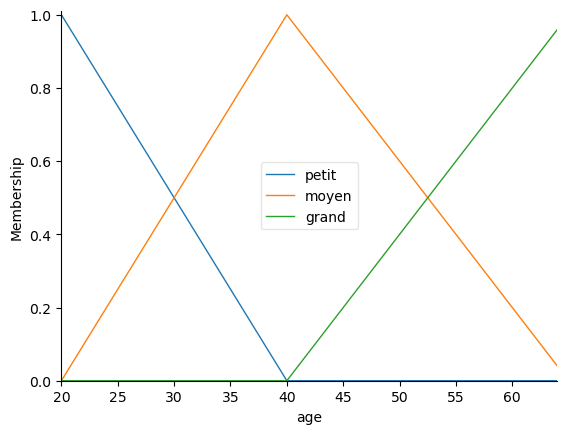

In [3]:
# Création des fonctions d'appartenance
# Définition des ensembles flous pour l'âge
age['petit'] = fuzz.trimf(age.universe, [20, 20, 40])
age['moyen'] = fuzz.trimf(age.universe, [20, 40, 65])
age['grand'] = fuzz.trimf(age.universe, [40, 65, 65])
age.view()


C:\Users\LENOVO\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


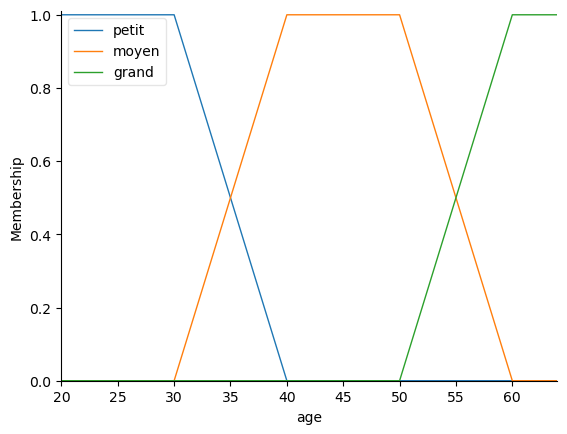

In [3]:
age['petit'] = fuzz.trapmf(age.universe, [20, 20, 30, 40])
age['moyen'] = fuzz.trapmf(age.universe, [30, 40, 50, 60])
age['grand'] = fuzz.trapmf(age.universe, [50, 60, 65, 65])
age.view()

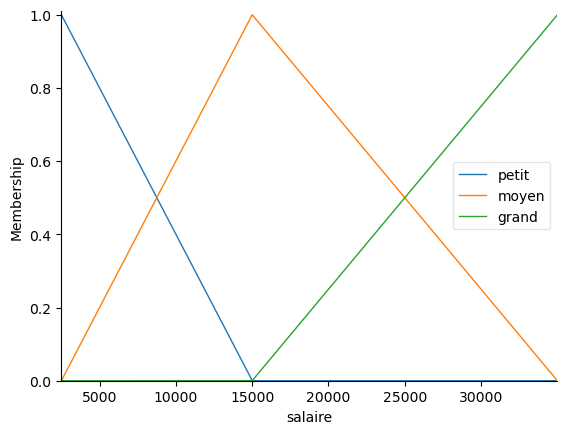

In [4]:
salaire['petit'] = fuzz.trimf(salaire.universe, [2500, 2500, 15000])
salaire['moyen'] = fuzz.trimf(salaire.universe, [2500, 15000, 35000])
salaire['grand'] = fuzz.trimf(salaire.universe,[15000, 35000, 35000])


salaire.view()

C:\Users\LENOVO\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


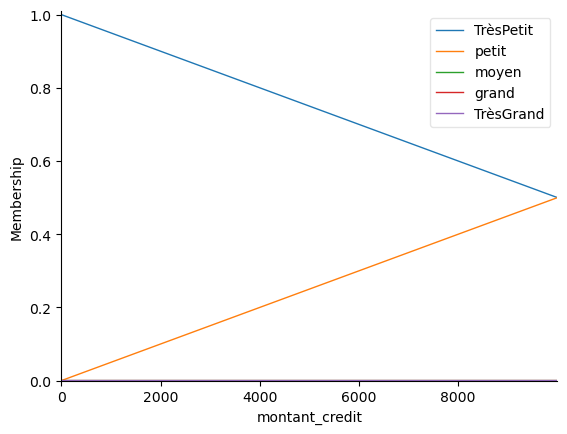

In [3]:
montant_credit['TrèsPetit'] = fuzz.trimf(montant_credit.universe, [0, 0, 20000])
montant_credit['petit'] = fuzz.trimf(montant_credit.universe, [0, 20000, 40000])
montant_credit['moyen'] = fuzz.trimf(montant_credit.universe, [20000, 40000, 60000])
montant_credit['grand'] = fuzz.trimf(montant_credit.universe, [40000, 60000, 80000])
montant_credit['TrèsGrand'] = fuzz.trimf(montant_credit.universe, [60000, 80000, 100000])
montant_credit.view()

In [6]:
# Définition des règles
rule1 = ctrl.Rule(age['moyen'] & salaire['moyen'], montant_credit['moyen'])
rule2 = ctrl.Rule(age['petit'] & salaire['petit'], montant_credit['TrèsPetit'])
# Règles supplémentaires

rule3 = ctrl.Rule(age['moyen'] & salaire['petit'], montant_credit['petit'])
rule4 = ctrl.Rule(age['grand'] & salaire['petit'], montant_credit['petit'])

rule5 = ctrl.Rule(age['petit'] & salaire['moyen'], montant_credit['TrèsPetit'])

rule6 = ctrl.Rule(age['grand'] & salaire['moyen'], montant_credit['moyen'])

rule7 = ctrl.Rule(age['petit'] & salaire['grand'], montant_credit['petit'])
rule8 = ctrl.Rule(age['moyen'] & salaire['grand'], montant_credit['grand'])
rule9 = ctrl.Rule(age['grand'] & salaire['grand'], montant_credit['TrèsGrand'])


In [7]:
# Création du système de contrôle
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping= ctrl.ControlSystemSimulation(tipping_ctrl)


In [8]:
# Entrées
tipping.input['age'] = 6.5
tipping.input['salaire'] = 9.8
# Calcul de la sortie
tipping.compute()




Estimation du pourboire : 4444.074064197878


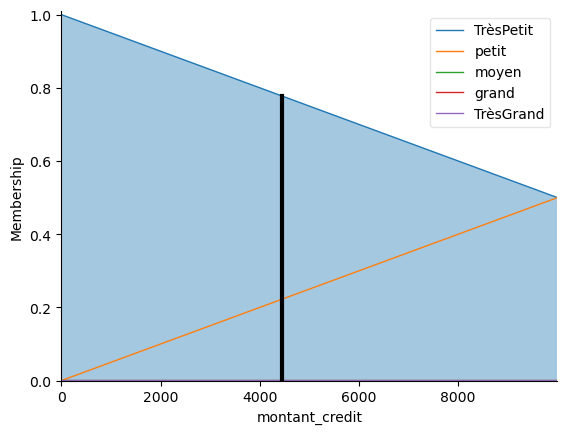

In [10]:

# Affichage de la valeur de sortie
print("Estimation du pourboire :", tipping.output['montant_credit'])

# Visualisation de l'activation des règles
montant_credit.view(sim=tipping)